2.2.1.1

In [56]:
import pandas as pd
data = pd.read_csv('../bank/bank.csv',sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


2.2.1.2

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


2.2.1.3

In [58]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [59]:
data["marital"].describe()

count        4521
unique          3
top       married
freq         2797
Name: marital, dtype: object

In [60]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

2.2.2.1

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


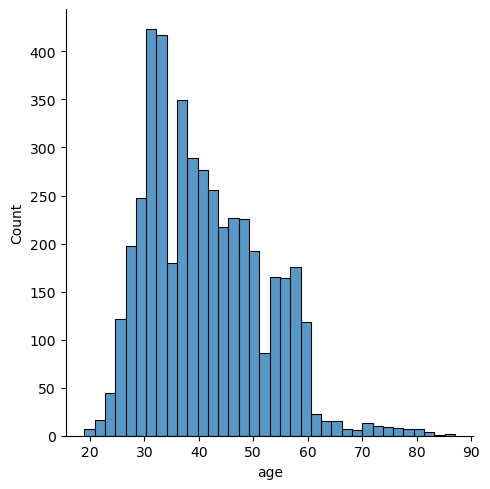

In [61]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data['age'])
plt.show()

2.2.2.2

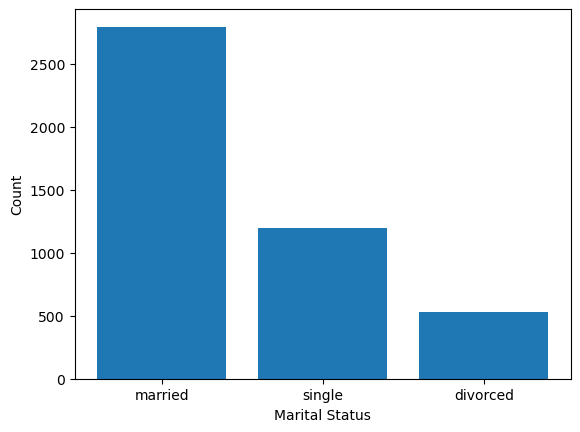

In [62]:
marital_counts = data['marital'].value_counts()
plt.bar(marital_counts.index, marital_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

2.2.2.3

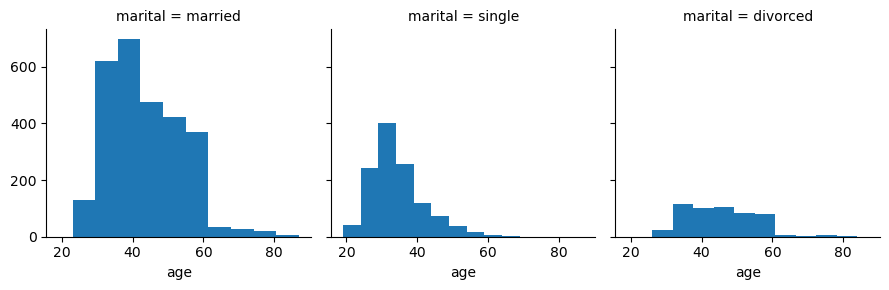

In [63]:
grid = sns.FacetGrid(data, col="marital")
grid.map(plt.hist, "age",bins=10)
plt.show()


2.3.1

In [64]:
from sklearn import datasets
digits = datasets.load_digits()
digits.keys()
# print (digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

2.3.2

In [65]:
from sklearn.model_selection import train_test_split
x= digits.data
y= digits.target
x.shape,y.shape

((1797, 64), (1797,))

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
x_train.shape,x_test.shape

((1347, 64), (450, 64))

In [67]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [68]:
clf.score(x_test, y_test)

0.9866666666666667

2.3.3

In [69]:
import pickle
model=open("model.pkl","wb")
pickle.dump(clf,model)
model.close()

In [70]:
model_file=open("model.pkl","rb")
clf2=pickle.load(model_file)
clf2.predict(x_test[-1:])

array([5])